In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [274]:
Dataset= pd.read_csv(r'/Users/akshaya/Downloads/Loan Status Prediction.csv')

In [275]:
Dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [276]:
Dataset.shape

(381, 13)

In [277]:
Dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [278]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [279]:
Dataset.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [280]:
Dataset['Loan_Amount_Term'].fillna(Dataset['Loan_Amount_Term'].median(),inplace=True)

In [281]:
Dataset['Self_Employed'].fillna('NA',inplace=True)

In [282]:
Dataset['Credit_History'].fillna(0,inplace=True)

In [283]:
Dataset['Gender'].fillna('Unknown',inplace=True)

In [284]:
Dataset['Dependents'].fillna(0,inplace=True)

In [285]:
Dataset['Dependents'] = Dataset['Dependents'].replace(to_replace='3+',value=3).astype('int64')

In [286]:
Dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [287]:
Dataset.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
296,LP002493,Male,No,0,Graduate,No,4166,0.0,98.0,360.0,0.0,Semiurban,N
351,LP002794,Female,No,0,Graduate,No,2667,1625.0,84.0,360.0,0.0,Urban,Y
241,LP002236,Male,Yes,2,Graduate,No,4566,0.0,100.0,360.0,1.0,Urban,N
98,LP001565,Male,Yes,1,Graduate,No,3089,1280.0,121.0,360.0,0.0,Semiurban,N
45,LP001205,Male,Yes,0,Graduate,No,2500,3796.0,120.0,360.0,1.0,Urban,Y
267,LP002357,Female,No,0,Not Graduate,No,2720,0.0,80.0,360.0,0.0,Urban,N
201,LP002035,Male,Yes,2,Graduate,No,3717,0.0,120.0,360.0,1.0,Semiurban,Y
253,LP002287,Female,No,0,Graduate,No,1500,1800.0,103.0,360.0,0.0,Semiurban,N
277,LP002387,Male,Yes,0,Graduate,No,2425,2340.0,143.0,360.0,1.0,Semiurban,Y
24,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,360.0,0.0,Urban,N


In [288]:
Features=Dataset.columns
Features

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

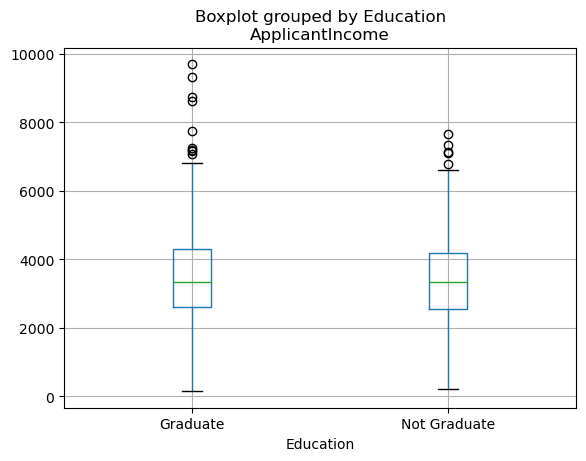

In [289]:
Dataset.boxplot(column='ApplicantIncome', by='Education')
plt.show()

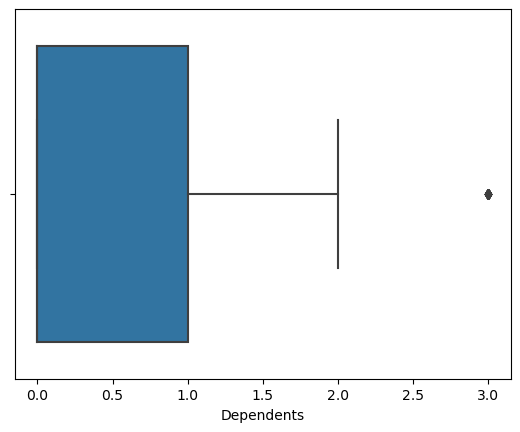

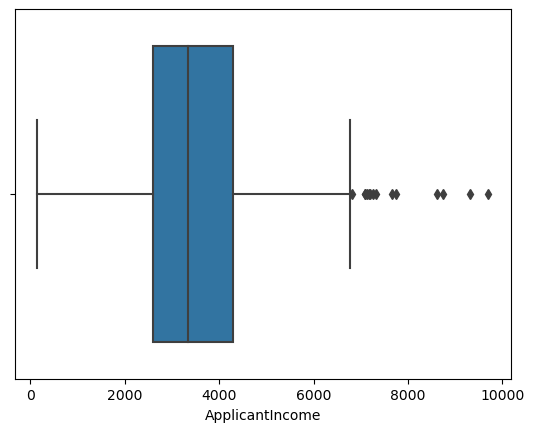

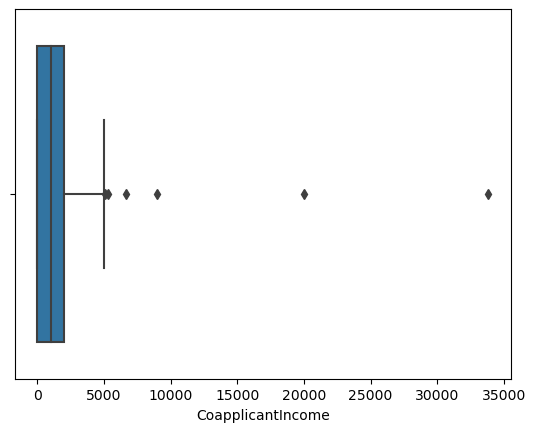

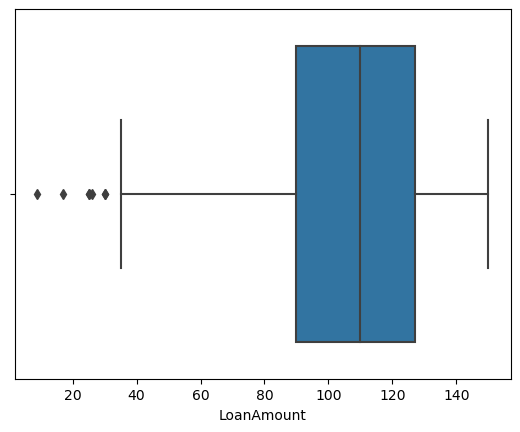

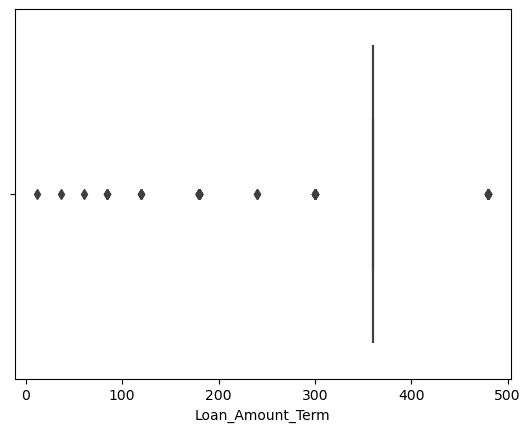

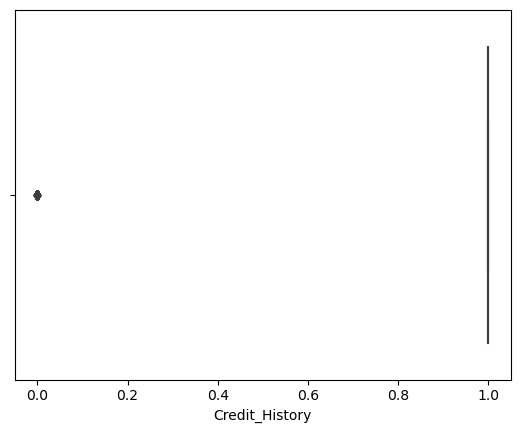

In [290]:
for i in Dataset.select_dtypes(include=['int','float']):
    sns.boxplot(data=Dataset,x=i)
    plt.show()

In [291]:
Q1=Dataset['ApplicantIncome'].quantile(0.25)

In [292]:
Q3=Dataset['ApplicantIncome'].quantile(0.75)

In [293]:
IQR=Q3-Q1

In [294]:
UB=Q3+1.5*IQR

In [295]:
LB=Q1-1.5*IQR

In [296]:
Upper_outlier=Dataset['ApplicantIncome']>UB
Lower_outlier=Dataset['ApplicantIncome']<LB

In [297]:
Dataset.loc[Upper_outlier,'ApplicantIncome']=Dataset['ApplicantIncome'].median()

In [298]:
LoanAmount_Q1=Dataset['LoanAmount'].quantile(0.25)
LoanAmount_Q3=Dataset['LoanAmount'].quantile(0.75)
IQR1=LoanAmount_Q3-LoanAmount_Q1
UB1=LoanAmount_Q3+1.5*IQR1
LB1=LoanAmount_Q1-1.5*IQR1
Upper_outlier1=Dataset['LoanAmount']>UB1
Lower_outlier1=Dataset['LoanAmount']<LB1

Dataset.loc[Lower_outlier1,'LoanAmount']=Dataset['LoanAmount'].median()

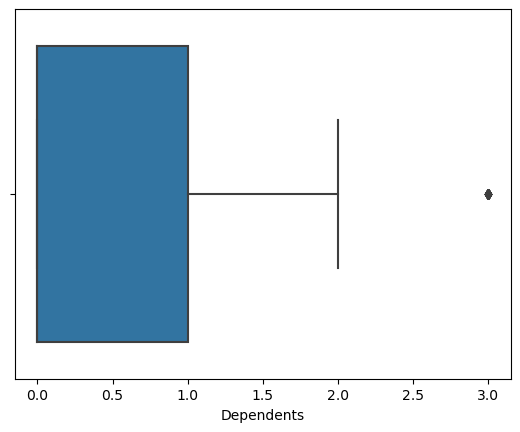

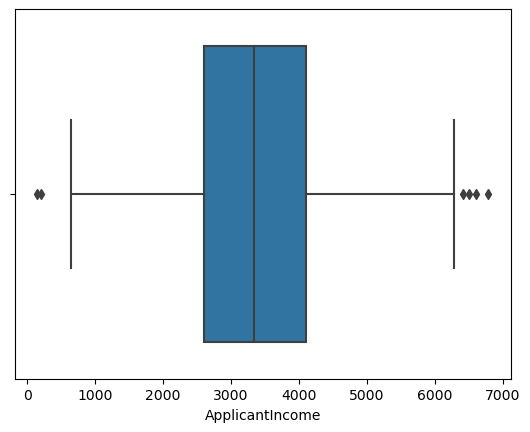

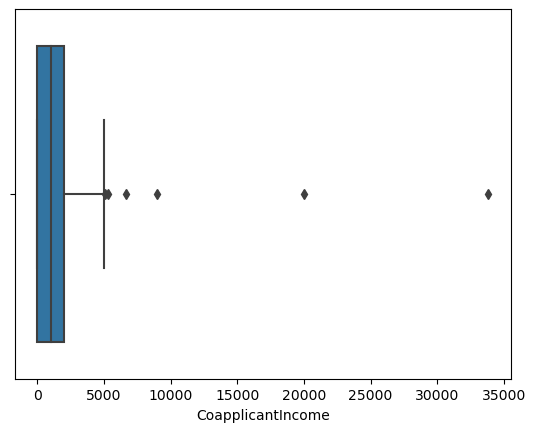

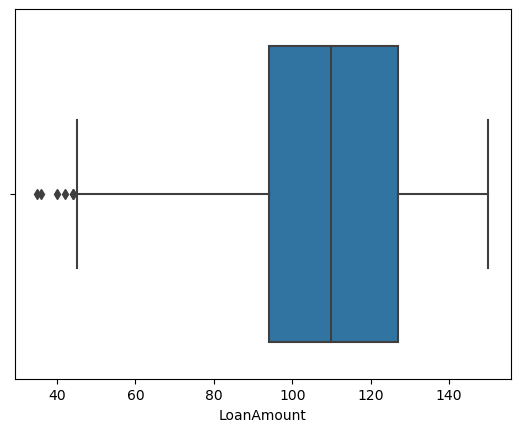

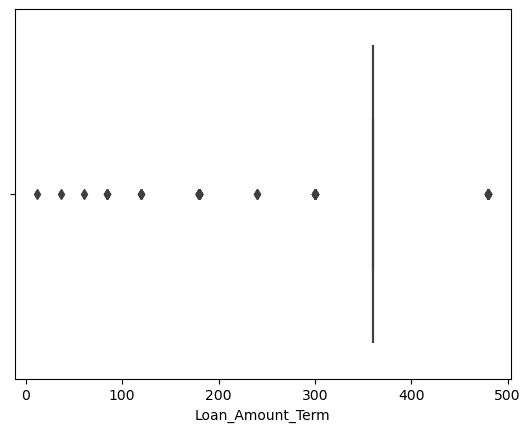

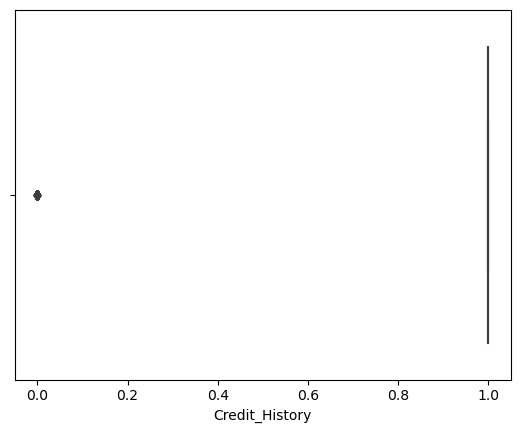

In [299]:
for i in Dataset.select_dtypes(include=['int','float']):
    sns.boxplot(data=Dataset,x=i)
    plt.show()

In [300]:
num=Dataset.select_dtypes(include=['int','float'])
num

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,4583,1508.0,128.0,360.0,1.0
1,0,3000,0.0,66.0,360.0,1.0
2,0,2583,2358.0,120.0,360.0,1.0
3,0,6000,0.0,141.0,360.0,1.0
4,0,2333,1516.0,95.0,360.0,1.0
...,...,...,...,...,...,...
376,3,5703,0.0,128.0,360.0,1.0
377,0,3232,1950.0,108.0,360.0,1.0
378,0,2900,0.0,71.0,360.0,1.0
379,3,4106,0.0,40.0,180.0,1.0


### Skewness

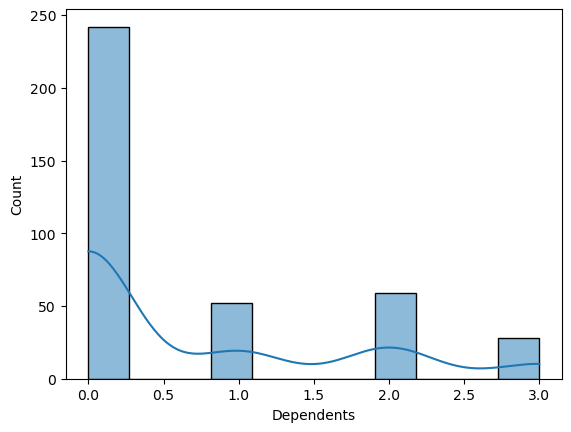

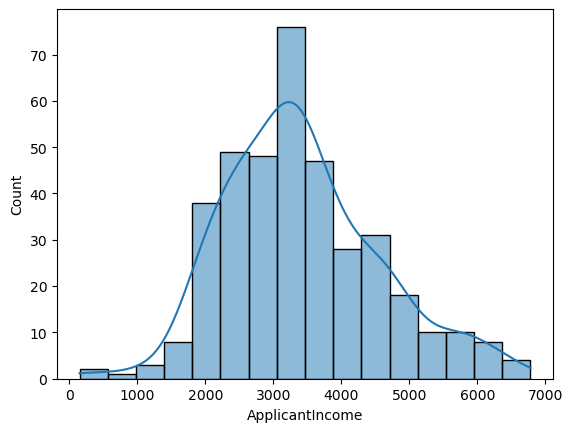

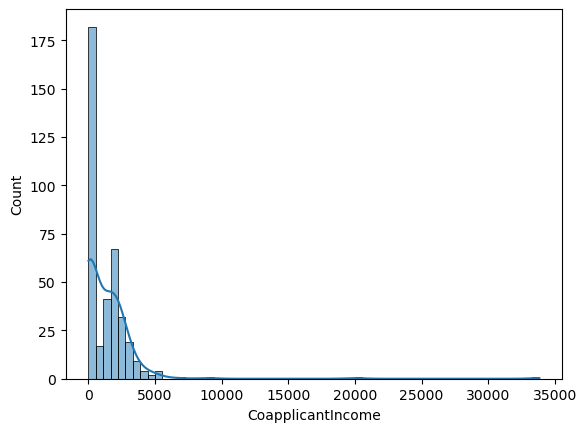

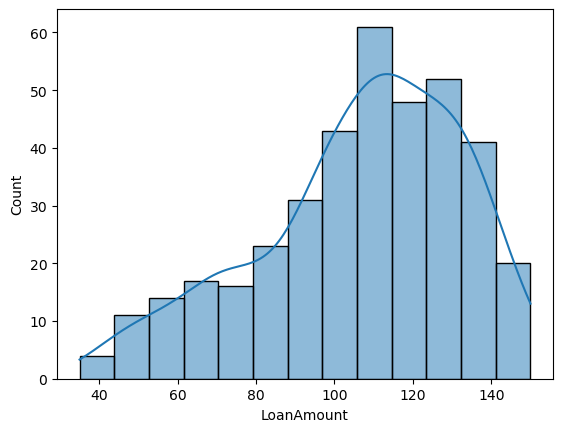

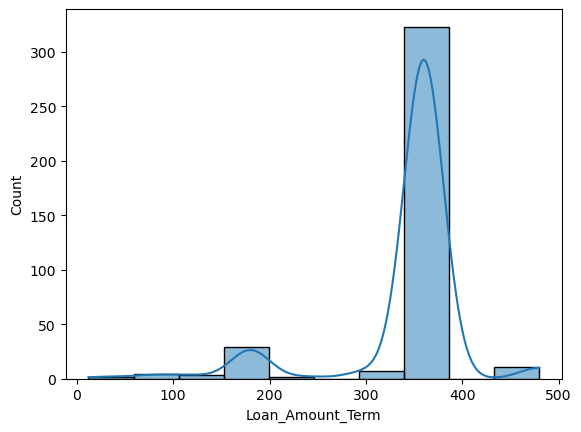

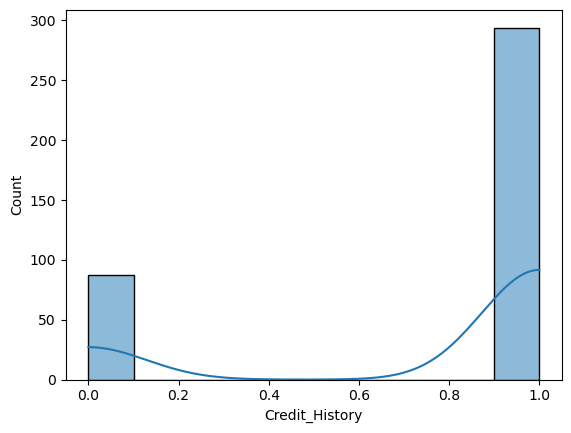

In [302]:
for i in num:
    sns.histplot(data=num,x=i,kde=True)
    plt.show()

In [303]:
num.skew()

Dependents           1.169190
ApplicantIncome      0.475039
CoapplicantIncome    8.660692
LoanAmount          -0.635957
Loan_Amount_Term    -2.253633
Credit_History      -1.299428
dtype: float64

In [304]:
from sklearn.preprocessing import PowerTransformer

In [305]:
pt=PowerTransformer(method='yeo-johnson')

In [306]:
Dataset['CoapplicantIncome']=pt.fit_transform(Dataset[['CoapplicantIncome']])

In [307]:
Dataset['CoapplicantIncome'].skew()

-0.10522413501509524

In [308]:
Dataset['Loan_Amount_Term']=pt.fit_transform(Dataset[['Loan_Amount_Term']])

In [309]:
Dataset['Loan_Amount_Term'].skew()

0.28826005292118356

In [310]:
Dataset['Credit_History']=pt.fit_transform(Dataset[['Credit_History']])

In [311]:
Dataset['Credit_History'].skew()

-1.2994277290313325

In [312]:
Dataset['LoanAmount']=pt.fit_transform(Dataset[['LoanAmount']])

In [313]:
Dataset['LoanAmount'].skew()

-0.16876645955902242

In [314]:
Dataset.drop('Loan_ID',axis=1,inplace=True)

In [315]:
Dataset.select_dtypes(exclude=['int','float'])

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,Male,Yes,Graduate,No,Rural,N
1,Male,Yes,Graduate,Yes,Urban,Y
2,Male,Yes,Not Graduate,No,Urban,Y
3,Male,No,Graduate,No,Urban,Y
4,Male,Yes,Not Graduate,No,Urban,Y
...,...,...,...,...,...,...
376,Male,Yes,Graduate,No,Urban,Y
377,Male,Yes,Graduate,No,Rural,Y
378,Female,No,Graduate,No,Rural,Y
379,Male,Yes,Graduate,No,Rural,Y


In [316]:
from sklearn.preprocessing import LabelEncoder

In [317]:
LE=LabelEncoder()

In [318]:
Dataset['Education']=LE.fit_transform(Dataset['Education'])

In [319]:
Dataset['Self_Employed']=LE.fit_transform(Dataset['Self_Employed'])

In [320]:
Dataset['Property_Area']=LE.fit_transform(Dataset['Property_Area'])

In [321]:
Dataset['Loan_Status']=LE.fit_transform(Dataset['Loan_Status'])

In [322]:
Dataset['Gender']=LE.fit_transform(Dataset['Gender'])

In [323]:
Dataset['Married']=LE.fit_transform(Dataset['Married'])

In [324]:
Dataset

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,1,4583,0.838278,0.840346,0.173703,0.543984,0,0
1,1,1,0,0,2,3000,-1.073517,-1.494897,0.173703,0.543984,2,1
2,1,1,0,1,1,2583,0.975551,0.464083,0.173703,0.543984,2,1
3,1,0,0,0,1,6000,-1.073517,1.498167,0.173703,0.543984,2,1
4,1,1,0,1,1,2333,0.839887,-0.569888,0.173703,0.543984,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
376,1,1,3,0,1,5703,-1.073517,0.840346,0.173703,0.543984,2,1
377,1,1,0,0,1,3232,0.916885,-0.059193,0.173703,0.543984,0,1
378,0,0,0,0,1,2900,-1.073517,-1.356805,0.173703,0.543984,0,1
379,1,1,3,0,1,4106,-1.073517,-2.065626,-2.225013,0.543984,0,1


In [325]:
#Dataset.Dependents.astype('float')

In [326]:
X=Dataset.drop('Loan_Status',axis=1)

In [327]:
y=Dataset.Loan_Status

In [328]:
from sklearn.model_selection import train_test_split

In [329]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=25)

In [330]:
from sklearn.linear_model import LogisticRegression

In [331]:
LR=LogisticRegression()

In [332]:
LR.fit(x_train,y_train)

LogisticRegression()

In [333]:
model_pred=LR.predict(x_test)

In [334]:
model_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1])

In [335]:
y_test

162    1
284    0
148    1
45     1
176    1
      ..
117    1
372    1
344    1
368    1
330    1
Name: Loan_Status, Length: 115, dtype: int64

In [336]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score

In [337]:
confusion_matrix(y_test,model_pred)

array([[18, 18],
       [ 9, 70]])

In [338]:
accuracy_score(y_test,model_pred)

0.7652173913043478

In [339]:
f1_score(y_test,model_pred)

0.8383233532934132

In [340]:
pd.DataFrame(y_train).value_counts()

Loan_Status
1              192
0               74
Name: count, dtype: int64

In [341]:
from sklearn.neighbors import KNeighborsClassifier

In [342]:
KNNC=KNeighborsClassifier(n_neighbors=103)

In [343]:
KNNC.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=103)

In [344]:
y_pred=KNNC.predict(x_test)

In [345]:
confusion_matrix(y_test,y_pred)

array([[ 0, 36],
       [ 0, 79]])

In [346]:
accuracy_score(y_test,y_pred)

0.6869565217391305

In [347]:
f1_score(y_test,y_pred)

0.8144329896907216

In [348]:
KNNC.score(x_train,y_train)

0.7218045112781954

In [349]:
KNNC.score(x_test,y_test)

0.6869565217391305

In [350]:
from sklearn.tree import DecisionTreeClassifier

In [351]:
DTC=DecisionTreeClassifier()

In [352]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [353]:
y1_pred=DTC.predict(x_test)

In [354]:
accuracy_score(y_test,y1_pred)

0.6782608695652174

In [355]:
f1_score(y_test,y1_pred)

0.7784431137724551